# import packages

In [78]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import seaborn as sns
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# read in The Dataset

In [2]:
harms = pd.read_csv('C:/Users/Franc/Documents/PTSD_Analysis/Jupiter_notebook/Harms.csv')

In [3]:
sns.__version__

'0.11.2'

# Data Exploration

In [4]:
harms.head(25)

,study_id,Study Class,Treatment Focus (Study level),Intervention Group,Treatment Focus (Arm level),Treatment Focus Subclass,Treatment Name,NCPTSD Treatment Name,Psychotherapy,Psychotherapy Subclass,...,Veteran Percent (Study level),Community Percent (Study level),Female Percent (Study level),Female Percent Detail (Study level),Male Percent (Study level),Trauma Type (Study level),Risk of Bias Rating (Study level),Citation,PTSDPubs ID,Year Added to PTSD-Repository
0,acarturk2016_A,Psychotherapy,PTSD,A,PTSD,NaN,EMDR Recent Traumatic Episode Protocol,Eye Movement Desensitization and Reprocessing ...,Yes,TF,...,NaN,1.0,0.7449,NaN,0.2551,Terrorism/political violence/forced displacement,Medium,"Acarturk C, Konuk E, Cetinkaya M, et al. The e...",45262.0,2019
1,acarturk2016_B,Psychotherapy,PTSD,B,Control,NaN,Waitlist,Waitlist,No,Not Applicable,...,NaN,1.0,0.7449,NaN,0.2551,Terrorism/political violence/forced displacement,Medium,"Acarturk C, Konuk E, Cetinkaya M, et al. The e...",45262.0,2019
2,acierno2017_A,Psychotherapy,PTSD,A,PTSD,NaN,PE delivered in-person,Prolonged Exposure (PE),Yes,TF,...,1.0,NaN,0.0379,NaN,0.9621,Combat-related,Medium,"Acierno RE, Knapp RG, Tuerk PW, et al. A non-i...",45948.0,2019
3,acierno2017_B,Psychotherapy,PTSD,B,PTSD,NaN,PE delivered via home-based telehealth,Prolonged Exposure (PE),Yes,TF,...,1.0,NaN,0.0379,NaN,0.9621,Combat-related,Medium,"Acierno RE, Knapp RG, Tuerk PW, et al. A non-i...",45948.0,2019
4,adenauer2011_A,Psychotherapy,PTSD,A,PTSD,NaN,NET,Narrative Exposure Therapy (NET),Yes,TF,...,NaN,1.0,0.4412,NaN,0.5588,Terrorism/political violence/forced displacement,High,"Adenauer H, Catani C, Gola H, et al. Narrative...",37889.0,2019
5,adenauer2011_B,Psychotherapy,PTSD,B,Control,NaN,Waitlist,Waitlist,No,Not Applicable,...,NaN,1.0,0.4412,NaN,0.5588,Terrorism/political violence/forced displacement,High,"Adenauer H, Catani C, Gola H, et al. Narrative...",37889.0,2019
6,ahmadi2015_A,Mixed: Psychotherapy & CIH,PTSD,A,PTSD,NaN,EMDR,Eye Movement Desensitization and Reprocessing ...,Yes,TF,...,0.0,0.0,0.0000,NaN,1.0000,Combat-related,High,"Ahmadi K, Hazrati M, Ahmadizadeh MJ, et al. RE...",46896.0,2019
7,ahmadi2015_B,Mixed: Psychotherapy & CIH,PTSD,B,PTSD,NaN,REM Desensitization,Rapid Eye Movement (REM) Desentization,No,Not Applicable,...,0.0,0.0,0.0000,NaN,1.0000,Combat-related,High,"Ahmadi K, Hazrati M, Ahmadizadeh MJ, et al. RE...",46896.0,2019
8,ahmadi2015_C,Mixed: Psychotherapy & CIH,PTSD,C,Control,NaN,Control,Waitlist,No,Not Applicable,...,0.0,0.0,0.0000,NaN,1.0000,Combat-related,High,"Ahmadi K, Hazrati M, Ahmadizadeh MJ, et al. RE...",46896.0,2019
9,ahmadizadeh2018_A,Nonpharmacologic biological,PTSD,A,PTSD,NaN,Bilateral rTMS,Transcranial magnetic stimualtion (TMS),No,Not Applicable,...,1.0,0.0,0.0000,NaN,1.0000,Combat-related,Medium,"Ahmadizadeh MJ, Rezaei M. Unilateral right and...",50480.0,2019


In [5]:
harms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 43 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   study_id                                    864 non-null    object 
 1   Study Class                                 864 non-null    object 
 2   Treatment Focus (Study level)               864 non-null    object 
 3   Intervention Group                          864 non-null    object 
 4   Treatment Focus (Arm level)                 861 non-null    object 
 5   Treatment Focus Subclass                    55 non-null     object 
 6   Treatment Name                              861 non-null    object 
 7   NCPTSD Treatment Name                       861 non-null    object 
 8   Psychotherapy                               861 non-null    object 
 9   Psychotherapy Subclass                      861 non-null    object 
 10  Pharmacotherap

In [6]:
harms.describe()

,Arm N Randomized,Serious Adverse Event Percent,Withdrawal Due to Adverse Events Percent,Attempted Suicide Percent,Completed Suicide Percent,Active Duty Military Percent (Study level),Veteran Percent (Study level),Community Percent (Study level),Female Percent (Study level),Male Percent (Study level),PTSDPubs ID,Year Added to PTSD-Repository
count,823.000000,226.000000,322.000000,73.00000,104.000000,368.000000,402.000000,810.000000,811.000000,811.000000,8.070000e+02,864.000000
mean,38.354800,0.026473,0.056412,0.00786,0.000410,0.092459,0.712438,0.623453,0.465688,0.534569,9.763631e+04,2019.224537
std,43.253376,0.066578,0.091492,0.01757,0.003664,0.278535,0.428940,0.475182,0.354237,0.354136,2.938470e+05,0.417519
min,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.580000e+02,2019.000000
25%,15.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.200000,0.000000,0.100400,0.227300,2.964400e+04,2019.000000
50%,26.000000,0.000000,0.003400,0.00000,0.000000,0.000000,1.000000,1.000000,0.500000,0.500000,4.188600e+04,2019.000000
75%,45.000000,0.030075,0.084650,0.00710,0.000000,0.000000,1.000000,1.000000,0.772700,0.899600,4.819000e+04,2019.000000
max,472.000000,0.467100,0.615400,0.10420,0.037000,1.000000,1.000000,1.000000,1.000000,1.000000,1.551835e+06,2020.000000


In [7]:
harms.shape

(864, 43)

In [8]:
harms.columns

Index(['study_id', 'Study Class', 'Treatment Focus (Study level)',
       'Intervention Group', 'Treatment Focus (Arm level)',
       'Treatment Focus Subclass', 'Treatment Name', 'NCPTSD Treatment Name',
       'Psychotherapy', 'Psychotherapy Subclass', 'Pharmacotherapy',
       'Pharmacotherapy Subclass', 'CIH', 'CIH Subclass',
       'Nonpharmacologic Biologic', 'Nonpharmacologic Cognitive', 'Control',
       'Other', 'Collaborative Care', 'Format', 'Delivery Method',
       'Arm N Randomized', 'Serious Adverse Event Percent',
       'Serious Adverse Event Detail',
       'Withdrawal Due to Adverse Events Percent',
       'Withdrawal Due to Adverse Events Detail', 'Attempted Suicide Percent',
       'Attempted Suicide Detail', 'Completed Suicide Percent',
       'Completed Suicide Detail', 'Harms Comment',
       'Military Status (Study level)',
       'Active Duty Military Percent (Study level)',
       'Veteran Percent (Study level)', 'Community Percent (Study level)',
       'Fem

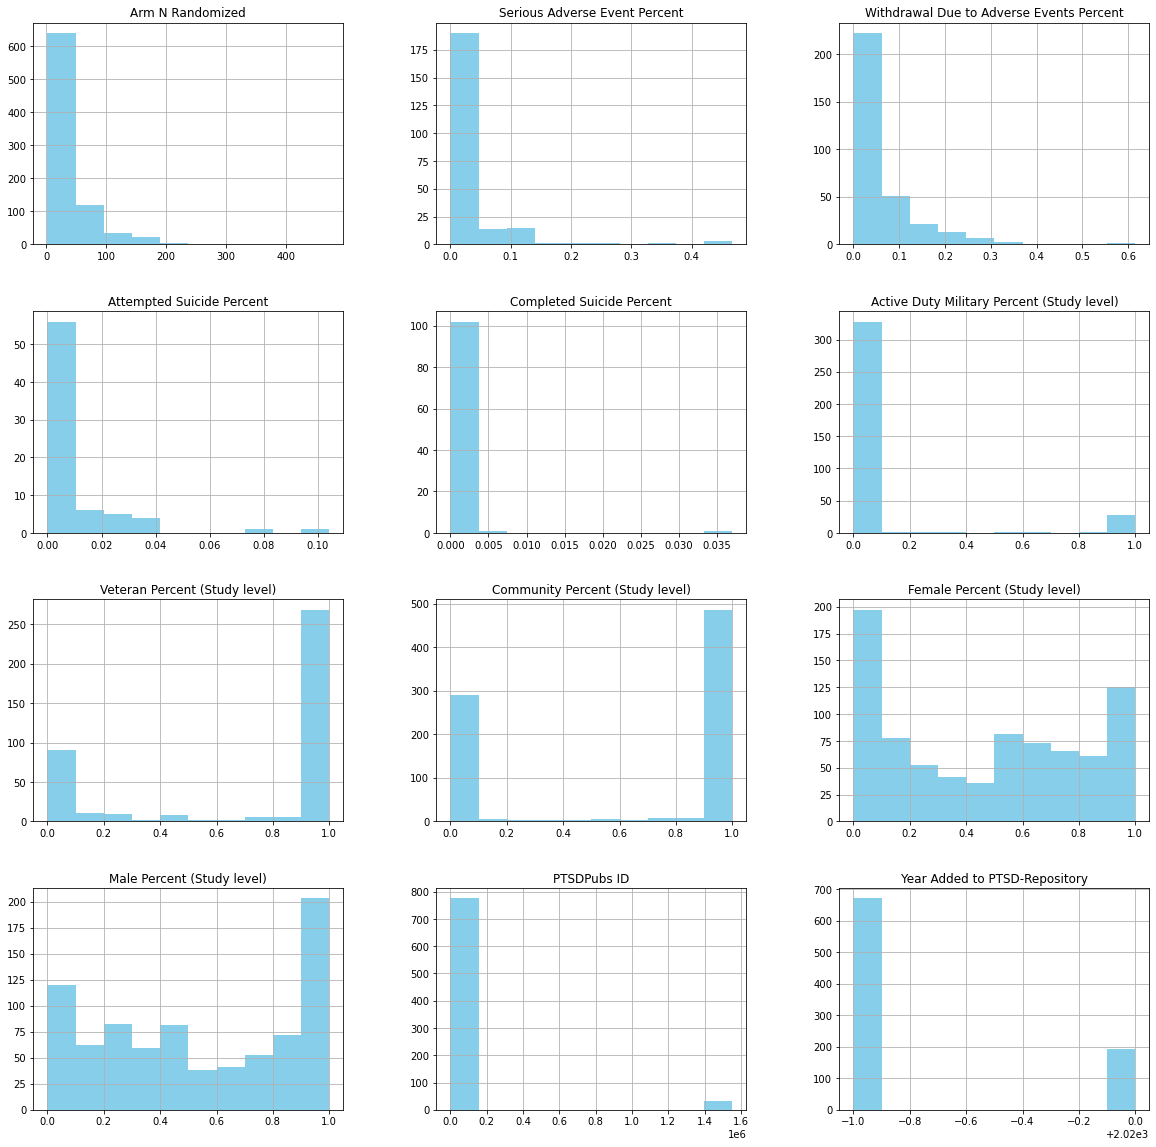

In [9]:
harms.hist(figsize=(20,20),color = "skyblue")
plt.show()

# Isolating ID's & DV for statistical analysis.

In [10]:
h2=harms[['Completed Suicide Percent', 'Attempted Suicide Percent', 'Veteran Percent (Study level)']]

In [11]:
h2.head(25)

,Completed Suicide Percent,Attempted Suicide Percent,Veteran Percent (Study level)
0,0.0,NaN,NaN
1,0.0,NaN,NaN
2,NaN,NaN,1.0
3,NaN,NaN,1.0
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,0.0
7,NaN,NaN,0.0
8,NaN,NaN,0.0
9,NaN,NaN,1.0


# fix the data that's not normal

In [12]:
h2['Veteran Percent (Study level)'].value_counts(dropna=False)

NaN       462
1.0000    260
0.0000     84
0.1152      4
0.9205      4
0.4000      4
0.8462      3
0.2690      3
0.0684      2
0.8222      2
0.1700      2
0.1190      2
0.0299      2
0.7018      2
0.2000      2
0.0400      2
0.9754      2
0.1000      2
0.9762      2
0.4844      2
0.2250      2
0.4817      2
0.7100      2
0.7857      2
0.2619      2
0.6020      2
0.5880      2
0.3143      2
Name: Veteran Percent (Study level), dtype: int64

# find correlation

In [13]:
h2[['Veteran Percent (Study level)', 'Attempted Suicide Percent']].corr()

,Veteran Percent (Study level),Attempted Suicide Percent
Veteran Percent (Study level),1.00000,-0.06315
Attempted Suicide Percent,-0.06315,1.00000


In [14]:
h2[['Veteran Percent (Study level)', 'Completed Suicide Percent']].corr()

,Veteran Percent (Study level),Completed Suicide Percent
Veteran Percent (Study level),1.000000,-0.163316
Completed Suicide Percent,-0.163316,1.000000


<AxesSubplot:>

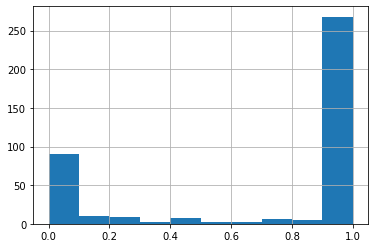

In [15]:
harms['Veteran Percent (Study level)'].hist()


# clean p the dataframe

In [16]:
h2=harms[['Attempted Suicide Percent','Veteran Percent (Study level)', 'Male Percent (Study level)']]

In [17]:
h2.head()

,Attempted Suicide Percent,Veteran Percent (Study level),Male Percent (Study level)
0,NaN,NaN,0.2551
1,NaN,NaN,0.2551
2,NaN,1.0,0.9621
3,NaN,1.0,0.9621
4,NaN,NaN,0.5588


# fix data that isn't normal

In [18]:
h2.dropna(inplace=True)

<ipython-input-18-11c137d72d44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h2.dropna(inplace=True)


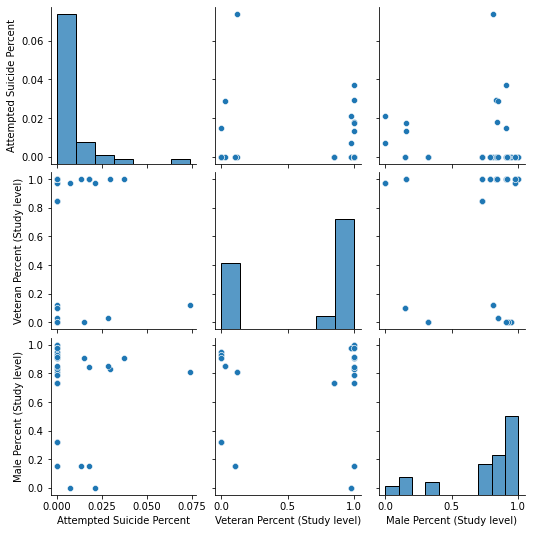

In [19]:
sns.pairplot(h2)

<AxesSubplot:>

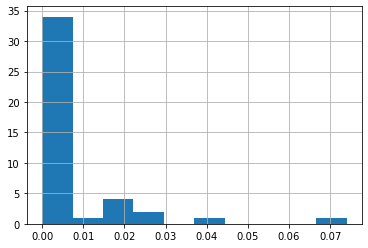

In [20]:
h2['Attempted Suicide Percent'].hist()


<AxesSubplot:>

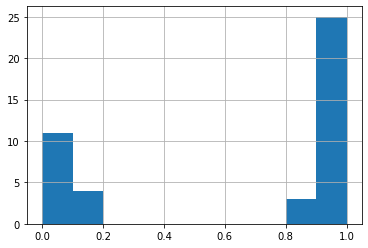

In [21]:
h2['Veteran Percent (Study level)'].hist()

# explore the dataframe

In [22]:
h2['Attempted Suicide Percent'].value_counts()


0.0000    33
0.0294     1
0.0286     1
0.0370     1
0.0134     1
0.0740     1
0.0071     1
0.0175     1
0.0150     1
0.0178     1
0.0210     1
Name: Attempted Suicide Percent, dtype: int64

In [23]:
h2['Veteran Percent (Study level)'].value_counts()

1.0000    21
0.0000     9
0.8462     3
0.1190     2
0.1000     2
0.9754     2
0.0299     2
0.9762     2
Name: Veteran Percent (Study level), dtype: int64

In [24]:
h2['Male Percent (Study level)'].value_counts()

0.7308    5
0.9100    4
0.8317    3
0.3210    3
0.0000    2
0.9500    2
0.9762    2
0.9090    2
0.9770    2
0.1512    2
0.1500    2
0.9128    2
0.8507    2
0.8448    2
0.7872    2
0.8095    2
0.9259    2
1.0000    2
Name: Male Percent (Study level), dtype: int64

# recode, transform the values in Attempted Suiced Percent

In [25]:
def recode_ASP (series):
    if series == 0.00:
        return 0
    else:
        return 1

In [26]:
h2['asp_recode']=h2['Attempted Suicide Percent'].apply(recode_ASP)

<ipython-input-26-bd94357e4f54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h2['asp_recode']=h2['Attempted Suicide Percent'].apply(recode_ASP)


In [27]:
h2.head()

,Attempted Suicide Percent,Veteran Percent (Study level),Male Percent (Study level),asp_recode
19,0.000,1.0000,1.0000,0
20,0.000,1.0000,1.0000,0
33,0.000,1.0000,0.9090,0
34,0.037,1.0000,0.9090,1
183,0.000,0.9762,0.9762,0


# Logistic Regression

In [28]:
x = h2[['Veteran Percent (Study level)', 'Male Percent (Study level)']]
y = h2['asp_recode']

In [29]:
logit = sm.Logit(y,x)
results = logit.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.485421
         Iterations 6
                               Results: Logit
Model:                    Logit                Pseudo R-squared:     0.105   
Dependent Variable:       asp_recode           AIC:                  45.7462 
Date:                     2021-11-18 14:54     BIC:                  49.2686 
No. Observations:         43                   Log-Likelihood:       -20.873 
Df Model:                 1                    LL-Null:              -23.321 
Df Residuals:             41                   LLR p-value:          0.026922
Converged:                1.0000               Scale:                1.0000  
No. Iterations:           6.0000                                             
-----------------------------------------------------------------------------
                               Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------

# Visualize the h3 data

Text(0, 0.5, 'asp_recode')

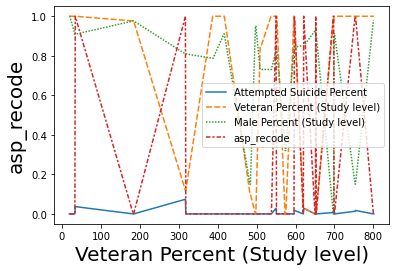

In [30]:
p = sns.lineplot(data =h2,)
p.set_xlabel("Veteran Percent (Study level)", fontsize = 20)
p.set_ylabel('asp_recode', fontsize = 20)

<AxesSubplot:xlabel='asp_recode', ylabel='Male Percent (Study level)'>

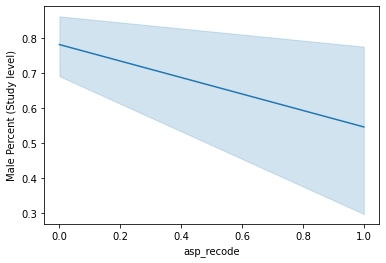

In [31]:
sns.lineplot(data=h2, x='asp_recode', y= 'Male Percent (Study level)')

<AxesSubplot:xlabel='asp_recode', ylabel='Male Percent (Study level)'>

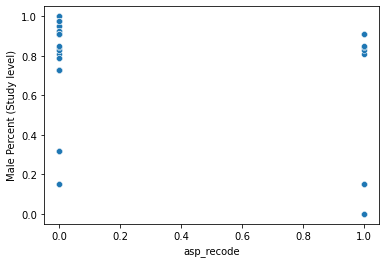

In [32]:
sns.scatterplot(data=h2, x='asp_recode', y= 'Male Percent (Study level)')

<AxesSubplot:xlabel='asp_recode', ylabel='Veteran Percent (Study level)'>

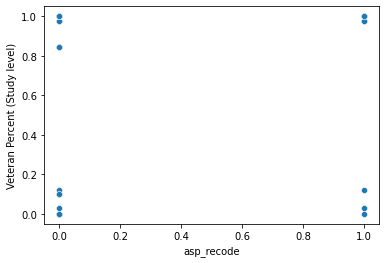

In [33]:
sns.scatterplot(data=h2, x='asp_recode', y= "Veteran Percent (Study level)")

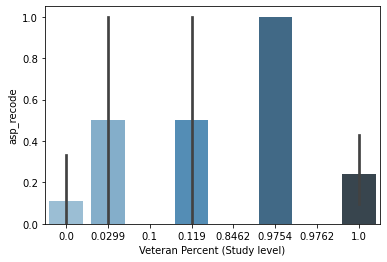

In [34]:

ax = sns.barplot(x="Veteran Percent (Study level)", y='asp_recode', data=h2,
                 palette="Blues_d")

<AxesSubplot:xlabel='Male Percent (Study level)', ylabel='asp_recode'>

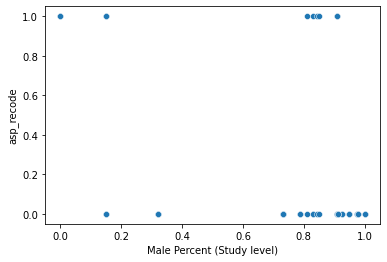

In [35]:
sns.scatterplot(data=h2, x='Male Percent (Study level)', y='asp_recode')


# add more variables

In [36]:
harms.columns

Index(['study_id', 'Study Class', 'Treatment Focus (Study level)',
       'Intervention Group', 'Treatment Focus (Arm level)',
       'Treatment Focus Subclass', 'Treatment Name', 'NCPTSD Treatment Name',
       'Psychotherapy', 'Psychotherapy Subclass', 'Pharmacotherapy',
       'Pharmacotherapy Subclass', 'CIH', 'CIH Subclass',
       'Nonpharmacologic Biologic', 'Nonpharmacologic Cognitive', 'Control',
       'Other', 'Collaborative Care', 'Format', 'Delivery Method',
       'Arm N Randomized', 'Serious Adverse Event Percent',
       'Serious Adverse Event Detail',
       'Withdrawal Due to Adverse Events Percent',
       'Withdrawal Due to Adverse Events Detail', 'Attempted Suicide Percent',
       'Attempted Suicide Detail', 'Completed Suicide Percent',
       'Completed Suicide Detail', 'Harms Comment',
       'Military Status (Study level)',
       'Active Duty Military Percent (Study level)',
       'Veteran Percent (Study level)', 'Community Percent (Study level)',
       'Fem

In [37]:
h3=harms[['Attempted Suicide Percent','Veteran Percent (Study level)', 'Male Percent (Study level)',  'Psychotherapy']]

In [38]:
h3.head(25)

,Attempted Suicide Percent,Veteran Percent (Study level),Male Percent (Study level),Psychotherapy
0,NaN,NaN,0.2551,Yes
1,NaN,NaN,0.2551,No
2,NaN,1.0,0.9621,Yes
3,NaN,1.0,0.9621,Yes
4,NaN,NaN,0.5588,Yes
5,NaN,NaN,0.5588,No
6,NaN,0.0,1.0000,Yes
7,NaN,0.0,1.0000,No
8,NaN,0.0,1.0000,No
9,NaN,1.0,1.0000,No


# fix the data that isn't normal and data wrangling on 'h3' dataframe

In [39]:
h3.dropna(inplace=True)

<ipython-input-39-3f4a8fc02267>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h3.dropna(inplace=True)


In [40]:
h3.head(25)

,Attempted Suicide Percent,Veteran Percent (Study level),Male Percent (Study level),Psychotherapy
19,0.0000,1.0000,1.0000,No
20,0.0000,1.0000,1.0000,No
33,0.0000,1.0000,0.9090,Yes
34,0.0370,1.0000,0.9090,Yes
183,0.0000,0.9762,0.9762,No
184,0.0000,0.9762,0.9762,No
317,0.0740,0.1190,0.8095,No
318,0.0000,0.1190,0.8095,No
387,0.0000,1.0000,0.7872,No
388,0.0000,1.0000,0.7872,No


In [41]:
def recode_ASP_h3 (series):
    if series == 0.00:
        return 0
    else:
        return 1

In [42]:
h3['asp_recode_h3']=h2['Attempted Suicide Percent'].apply(recode_ASP_h3)

<ipython-input-42-4b2c984b6d4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h3['asp_recode_h3']=h2['Attempted Suicide Percent'].apply(recode_ASP_h3)


In [43]:
h3.head(25)

,Attempted Suicide Percent,Veteran Percent (Study level),Male Percent (Study level),Psychotherapy,asp_recode_h3
19,0.0000,1.0000,1.0000,No,0
20,0.0000,1.0000,1.0000,No,0
33,0.0000,1.0000,0.9090,Yes,0
34,0.0370,1.0000,0.9090,Yes,1
183,0.0000,0.9762,0.9762,No,0
184,0.0000,0.9762,0.9762,No,0
317,0.0740,0.1190,0.8095,No,1
318,0.0000,0.1190,0.8095,No,0
387,0.0000,1.0000,0.7872,No,0
388,0.0000,1.0000,0.7872,No,0


In [44]:
def recode_Psychotherapy_h3 (series):
    if series == 'No':
        return 0
    if series == 'Yes':
        return 1

In [45]:
h3['Psychotherapy_recode_h3']=h3['Psychotherapy'].apply(recode_Psychotherapy_h3)

<ipython-input-45-1f6ae0f13f96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h3['Psychotherapy_recode_h3']=h3['Psychotherapy'].apply(recode_Psychotherapy_h3)


In [46]:
h3.head(25)

,Attempted Suicide Percent,Veteran Percent (Study level),Male Percent (Study level),Psychotherapy,asp_recode_h3,Psychotherapy_recode_h3
19,0.0000,1.0000,1.0000,No,0,0
20,0.0000,1.0000,1.0000,No,0,0
33,0.0000,1.0000,0.9090,Yes,0,1
34,0.0370,1.0000,0.9090,Yes,1,1
183,0.0000,0.9762,0.9762,No,0,0
184,0.0000,0.9762,0.9762,No,0,0
317,0.0740,0.1190,0.8095,No,1,0
318,0.0000,0.1190,0.8095,No,0,0
387,0.0000,1.0000,0.7872,No,0,0
388,0.0000,1.0000,0.7872,No,0,0


# Run a logical Logical Regression model

In [47]:
x = h3[['Veteran Percent (Study level)', 'Male Percent (Study level)','Psychotherapy_recode_h3']]
y = h3['asp_recode_h3']

In [48]:
logit = sm.Logit(y,x)
results = logit.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.480285
         Iterations 6
                               Results: Logit
Model:                    Logit                Pseudo R-squared:     0.114   
Dependent Variable:       asp_recode_h3        AIC:                  47.3045 
Date:                     2021-11-18 14:54     BIC:                  52.5881 
No. Observations:         43                   Log-Likelihood:       -20.652 
Df Model:                 2                    LL-Null:              -23.321 
Df Residuals:             40                   LLR p-value:          0.069338
Converged:                1.0000               Scale:                1.0000  
No. Iterations:           6.0000                                             
-----------------------------------------------------------------------------
                               Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------

In [49]:
# here we see a significant P-value of .0045 in Male Percentage (Study level)

# bar chart the h3 Attempted Suicide and the male percentage

<AxesSubplot:xlabel='asp_recode_h3', ylabel='Male Percent (Study level)'>

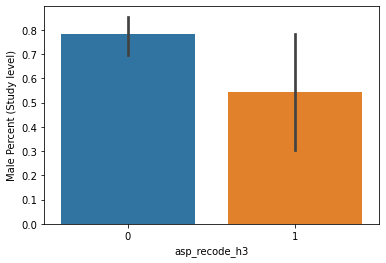

In [50]:
sns.barplot(x='asp_recode_h3', y='Male Percent (Study level)', data=h3)

# Visualize the rest of the H3 data frame...

<AxesSubplot:xlabel='asp_recode_h3', ylabel='Psychotherapy_recode_h3'>

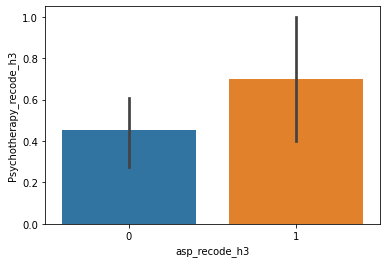

In [51]:
sns.barplot(x='asp_recode_h3', y='Psychotherapy_recode_h3', data=h3)

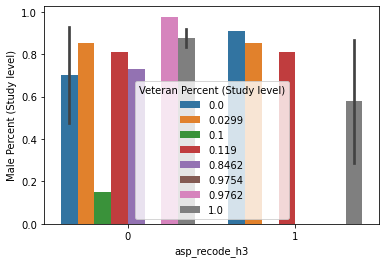

In [52]:
ax = sns.barplot(x="asp_recode_h3", y="Male Percent (Study level)", hue="Veteran Percent (Study level)", data=h3)


<AxesSubplot:xlabel='asp_recode_h3', ylabel='Male Percent (Study level)'>

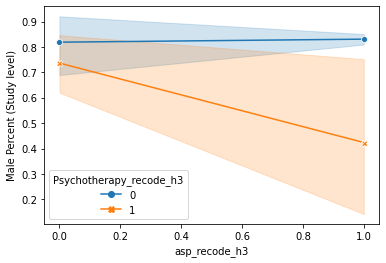

In [53]:
sns.lineplot(
    data=h3,
    x='asp_recode_h3', y='Male Percent (Study level)', hue='Psychotherapy_recode_h3', style='Psychotherapy_recode_h3',
    markers=True, dashes=False
)

# Summary barplot

<AxesSubplot:xlabel='asp_recode_h3', ylabel='Psychotherapy_recode_h3'>

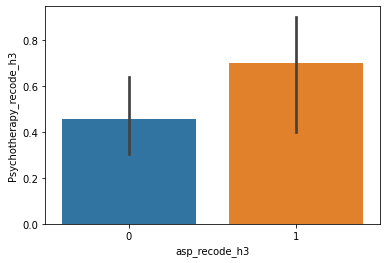

In [54]:
sns.barplot(
    data=h3,
    x='asp_recode_h3', y='Psychotherapy_recode_h3')

<AxesSubplot:xlabel='asp_recode_h3', ylabel='Veteran Percent (Study level)'>

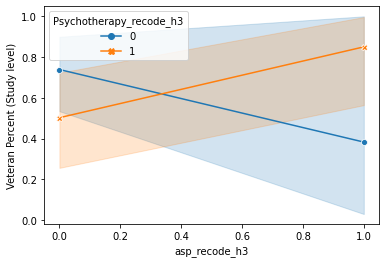

In [55]:
sns.lineplot(
    data=h3,
    x='asp_recode_h3', y='Veteran Percent (Study level)', hue='Psychotherapy_recode_h3', style='Psychotherapy_recode_h3',
    markers=True, dashes=False
)

# Decision Tree model

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define x and y variables

In [57]:
x = h3[['Veteran Percent (Study level)', 'Male Percent (Study level)','Psychotherapy_recode_h3']]
y = h3['asp_recode_h3']

# Train Test, split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

# initial decision tree

In [79]:
decisionTree = DecisionTreeClassifier( random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

In [83]:
treePredictions =decisionTree.predict(x_test)
print(confusion_matrix(y_test, treePredictions))

[[5 3]
 [5 0]]


In [84]:
print(classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.00      0.00      0.00         5

    accuracy                           0.38        13
   macro avg       0.25      0.31      0.28        13
weighted avg       0.31      0.38      0.34        13



In [85]:
x_test.shape


(13, 3)

In [86]:
harms.shape

(0, 43)

In [87]:
harms['Attempted Suicide Percent'].value_counts(dropna=False)

Series([], Name: Attempted Suicide Percent, dtype: int64)

In [88]:
from sklearn.metrics import plot_confusion_matrix

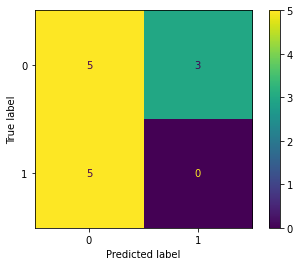

In [89]:
plot_confusion_matrix(decisionTree, x_test, y_test)  
plt.show()


In [90]:
h3.shape

(43, 6)

In [91]:
harms.columns

Index(['study_id', 'Study Class', 'Treatment Focus (Study level)',
       'Intervention Group', 'Treatment Focus (Arm level)',
       'Treatment Focus Subclass', 'Treatment Name', 'NCPTSD Treatment Name',
       'Psychotherapy', 'Psychotherapy Subclass', 'Pharmacotherapy',
       'Pharmacotherapy Subclass', 'CIH', 'CIH Subclass',
       'Nonpharmacologic Biologic', 'Nonpharmacologic Cognitive', 'Control',
       'Other', 'Collaborative Care', 'Format', 'Delivery Method',
       'Arm N Randomized', 'Serious Adverse Event Percent',
       'Serious Adverse Event Detail',
       'Withdrawal Due to Adverse Events Percent',
       'Withdrawal Due to Adverse Events Detail', 'Attempted Suicide Percent',
       'Attempted Suicide Detail', 'Completed Suicide Percent',
       'Completed Suicide Detail', 'Harms Comment',
       'Military Status (Study level)',
       'Active Duty Military Percent (Study level)',
       'Veteran Percent (Study level)', 'Community Percent (Study level)',
       'Fem

In [92]:
harms['Serious Adverse Event Percent'].value_counts(dropna=False)

Series([], Name: Serious Adverse Event Percent, dtype: int64)

In [93]:
harms['Serious Adverse Event Percent'].head(127)

Series([], Name: Serious Adverse Event Percent, dtype: float64)

In [94]:
harms.dropna(inplace=True)

In [95]:
h4=harms[['Attempted Suicide Percent','Veteran Percent (Study level)', 'Male Percent (Study level)', 'Serious Adverse Event Percent', 'Psychotherapy']]

In [96]:
def recode_ASP_h4 (series):
    if series == 0.00:
        return 0
    else:
        return 1

In [97]:
h4['asp_recode_h4']=h4['Attempted Suicide Percent'].apply(recode_ASP_h4)

In [98]:
def recode_Psychotherapy_h4 (series):
    if series == 'No':
        return 0
    if series == 'Yes':
        return 1

In [99]:
h4['Psychotherapy_recode_h4']=h4['Psychotherapy'].apply(recode_Psychotherapy_h4)